This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


train_images: Contains the images used for training the neural network.

train_labels: Contains the corresponding labels for the training images (i.e., the actual digit each image represents).

test_images: Contains the images used for testing the performance of the trained network.

test_labels: Contains the corresponding labels for the testing images.

In [2]:
train_images.shape

(60000, 28, 28)

train_images is a NumPy array containing the training images.
.shape is an attribute of NumPy arrays that tells us the dimensions of the array (how many images there are, their height, and their width).

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Tensorflow** = package, **keras** = API for building and training neural networks,
layers = access to different types of neural network layers.

**model = keras.Sequential(...)** = creating the simplest type of keras model, sequetial model. This stacks layers sequentally - meaning each layer has one input tensor and one output tensor, making it a straight pipeline of layers.Is a linear model. A tensor is a data struture.

**layers.Dense(512, activation="relu")**: This adds a densely connected layer to the model (also known as a fully connected layer).
**512**: This is the number of neurons or units within the layer. Each neuron learns to detect specific features or patterns in the input data.
**activation="relu**": This sets the activation function of the layer to the Rectified Linear Unit (ReLU). An activation function introduces non-linearity to the model, allowing it to learn complex relationships in the data. ReLU is a popular activation function.

**ayers.Dense(10, activation="softmax"):** This is the output layer of the model.
**10**: This layer has 10 neurons, corresponding to the 10 possible digit classes (0-9) in the MNIST dataset (which this code is likely used with).
**activation="softmax"**: This layer uses the softmax activation function to generate probabilities for each of the 10 digit classes. The class with the highest probability is the model's prediction.



**The compilation step**

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Figures the model for training.
**The optimizer** determines how the model will update its weights based on the data it sees.
**The loss function** quantifies the difference between the model's predictions and the actual target values.
**sparse_categorical_crossentropy** is a common loss function used for multi-class classification problems where the target labels are integers (like in this case, digits 0-9).
**Metrics** are used to evaluate the performance of the model during training.

**Preparing the image data**

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

10000 and 60000 are images. 28*28 is the size of the arraz each image is flattended into.
**astype("float32")** converts the data type of the image arrays to float32.
**/ 255 **divides each pixel value by 255. This operation normalizes the pixel values to a range between 0 and 1.

**"Fitting" the model**

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8691 - loss: 0.4471
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9658 - loss: 0.1172
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9786 - loss: 0.0699
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9850 - loss: 0.0516
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9888 - loss: 0.0377


**epochs=5**: epochs refers to the number of times the training process will iterate over the entire training dataset.
**batch_size=128: batch_size** controls how many images are processed before the model updates its internal parameters (weights). Dividing the training data into batches is for efficiency as well as to improve how well the model generalizes.

**Using the model to make predictions**

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([1.5843495e-08, 1.8230490e-09, 9.0865689e-07, 2.4350782e-06,
       1.2368508e-10, 2.6978761e-09, 2.2257625e-12, 9.9999577e-01,
       3.4152276e-08, 7.7347983e-07], dtype=float32)

In [15]:
predictions[0].argmax()

7

**argmax** finds the index (or position) of the maximum value within that element. Meaning this line finds the digit with the highest probability.

In [16]:
predictions[0][7]

0.99999577

In [17]:
test_labels[0]

7

**Evaluating the model on new data**

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0744
test_acc: 0.98089998960495


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [19]:
import numpy as np
x = np.array(12)
x

array(12)

**x = np.array(12):** Here, we're creating a NumPy array named x and assigning it the value 12. This x is our scalar (a single numerical value).

In [20]:
x.ndim

0

### Vectors (rank-1 tensors)

In [21]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [22]:
x.ndim

1

**Rank-1 Tensors: Vectors**
In the world of tensors, a rank-1 tensor is simply a vector. Think of it as a list of numbers. Each number in the list is an element of the vector.

Here's a breakdown:

**Rank**: The rank of a tensor refers to the number of dimensions or axes it has. Since a vector has only one dimension (a single line of numbers), it's called a rank-1 tensor.

**Visual Representation**: Imagine a single row or column of numbers. That's your vector, your rank-1 tensor.

### Matrices (rank-2 tensors)

In [23]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

**Rank-2 Tensors: Matrices**
A rank-2 tensor is essentially a matrix. You can think of it as a grid of numbers arranged in rows and columns.

Here's a breakdown:

**Rank**: As the name suggests, rank-2 tensors have two dimensions. These dimensions correspond to the rows and columns of the matrix.

**Visual Representation:** Imagine a table of numbers with rows and columns. That's your matrix, your rank-2 tensor.

In this example, x is a rank-2 tensor because it's a two-dimensional array with 3 rows and 5 columns.





### Rank-3 and higher-rank tensors

> Tilføj citatblok



In [24]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

**Rank-3 Tensors and Beyond**
Rank-3 tensors are a step up in complexity from matrices (rank-2 tensors). They can be visualized as a cube of numbers or a stack of matrices.

Here's a breakdown:

**Rank**: Rank-3 tensors have three dimensions. You can think of these dimensions as height, width, and depth (or channels, depending on the context).

**Visual Representation:** Imagine a Rubik's Cube where each small cube contains a number. That's a good analogy for a rank-3 tensor. Alternatively, picture a stack of matrices—that's another way to visualize them.

### Key attributes

In [25]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
train_images.ndim

3

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_images.dtype

dtype('uint8')

Imagine you have a container (the NumPy array train_images) that holds a collection of items (the image data). The .dtype attribute tells you what type of items are stored in the container – for example, whether they are integers, floating-point numbers, or something else.

**Displaying the fourth digit**

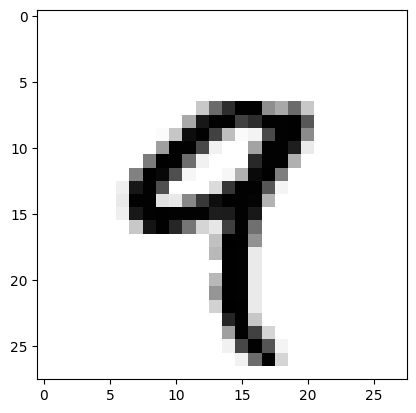

In [29]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**digit = train_images[4]:** This line extracts the fourth image from the train_images dataset and assigns it to the variable digit.

**plt.imshow()** is a function in pyplot that displays an image.

**cmap=plt.cm.binary** is an optional argument that specifies the colormap to use for displaying the image. In this case, plt.cm.binary indicates that the image should be displayed in grayscale (black and white).



In [30]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [31]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [33]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [37]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [38]:
batch = train_images[:128]

**[:128]:** This is called slicing notation. It's used to select a portion of an array. In this case, it's selecting the elements from the beginning of the array (index 0) up to, but not including, index 12

In [39]:
batch = train_images[128:256]

In [42]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [43]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

**naive_relu**: This function is a basic implementation of the Rectified Linear Unit (ReLU) activation function, a fundamental component in neural networks. Here's how it works step-by-step:

1. assert len(x.shape) == 2: This line checks if the input x is a 2-dimensional tensor (a matrix). If it's not, it raises an error. This ensures the function is used with the expected data type.

2. x = x.copy(): This line creates a copy of the input x. This is done to avoid modifying the original input data, which is generally good practice in programming.

3. Nested Loops:


*   for i in range(x.shape[0]):: This loop iterates over the rows of the input matrix x.
*   for j in range(x.shape[1]):: This nested loop iterates over the columns of the input matrix x.


4. x[i, j] = max(x[i, j], 0): This is the core of the ReLU function. For each element in the matrix x, it applies the following logic:

*   If the element is greater than 0, it remains unchanged.
*   If the element is less than or equal to 0, it is set to 0.

5. return x: The function returns the modified matrix x after applying the ReLU activation to all its elements.




In [44]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

**naive_add:** This function is a basic, element-wise addition operation for two tensors (represented as NumPy arrays).

In [47]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [46]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.81 s


### Broadcasting

Broadcasting is a powerful mechanism that allows NumPy to perform element-wise operations on arrays with different shapes, as long as those shapes are compatible in a specific way. It eliminates the need to write explicit loops to handle these differences, leading to cleaner and more efficient code.



In [48]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [49]:
y = np.expand_dims(y, axis=0)

In [50]:
Y = np.concatenate([y] * 32, axis=0)

In [54]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

**def** -> define

**assert** statements are used to check for conditions.

**len(x.shape) == 2:**This line checks if the input x is a 2-dimensional tensor (a matrix) as expected.

**len(y.shape) == 1**: This line checks if the input y is a 1-dimensional tensor (a vector) as expected.

**x.shape[1] == y.shape[0]:** This ensures that the number of columns in the matrix (x) matches the number of elements in the vector (y). This is essential for element-wise addition.

In [56]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In the context of linear algebra and deep learning, the tensor product is a way to combine two tensors (vectors, matrices, or higher-dimensional arrays) to create a new, larger tensor. It's a fundamental operation that underlies many computations in neural networks, especially in densely connected layers (fully connected layers).

In [57]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [58]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [59]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [60]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [61]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [62]:
train_images = train_images.reshape((60000, 28 * 28))

In [63]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [64]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [65]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In TensorFlow, the Gradient Tape is a powerful tool used for automatic differentiation. It essentially records the operations performed on tensors within a specific context, allowing you to later calculate the gradients of those operations with respect to any input variables.

In [66]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [67]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [68]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [69]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [70]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [71]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [72]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8709 - loss: 0.4438
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9659 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9792 - loss: 0.0708
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9850 - loss: 0.0514
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9888 - loss: 0.0366


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [73]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [74]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [75]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [76]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [77]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [78]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [79]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [80]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [81]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 3.93
loss at batch 100: 2.27
loss at batch 200: 2.19
loss at batch 300: 2.12
loss at batch 400: 2.27
Epoch 1
loss at batch 0: 1.94
loss at batch 100: 1.90
loss at batch 200: 1.81
loss at batch 300: 1.74
loss at batch 400: 1.88
Epoch 2
loss at batch 0: 1.61
loss at batch 100: 1.59
loss at batch 200: 1.48
loss at batch 300: 1.45
loss at batch 400: 1.56
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.35
loss at batch 200: 1.22
loss at batch 300: 1.22
loss at batch 400: 1.31
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.17
loss at batch 200: 1.03
loss at batch 300: 1.06
loss at batch 400: 1.14
Epoch 5
loss at batch 0: 1.00
loss at batch 100: 1.03
loss at batch 200: 0.89
loss at batch 300: 0.94
loss at batch 400: 1.02
Epoch 6
loss at batch 0: 0.89
loss at batch 100: 0.92
loss at batch 200: 0.79
loss at batch 300: 0.84
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [82]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary